# Selective Search for Object Detection


http://github.com/alireza-akhavan/object-detection-notebooks

### dependecies:

You need to install `opencv-contrib-python` by: 

`pip install opencv-contrib-python`

### imports:

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# speed-up using multithreads
cv2.setUseOptimized(True);
cv2.setNumThreads(4);

Several region proposal methods have been proposed such as

    Objectness
    Constrained Parametric Min-Cuts for Automatic Object Segmentation
    Category Independent Object Proposals
    Randomized Prim
    Selective Search

Amongst all these region proposal methods Selective Search is most commonly used because it is fast and has a very high recall.

Read more:

https://learnopencv.com/selective-search-for-object-detection-cpp-python/

### read image

In [5]:
im = cv2.imread('img/catdog.png')
print(im.shape)

(290, 434, 3)


### Create Selective Search Segmentation Object

In [6]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

### set input image

In [7]:
ss.setBaseImage(im)

### Choose between fast or accurate selective Search method:

fast but low recall 
V.S. 
high recall but slow 


In [8]:
#ss.switchToSelectiveSearchFast()
ss.switchToSelectiveSearchQuality()

### run selective search

In [9]:
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

Total Number of Region Proposals: 2525


### Show selective search results

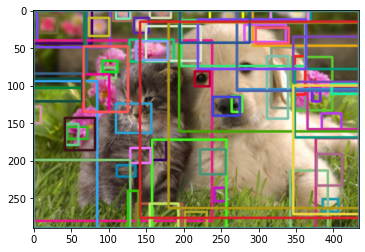

In [14]:
# number of region proposals to show
numShowRects = 70


# create a copy of original image
imOut = im.copy()

# itereate over all the region proposals
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < numShowRects):
        x, y, w, h = rect
        color = list(np.random.random(size=3) * 256)
        cv2.rectangle(imOut, (x, y), (x+w, y+h), color, 2, cv2.LINE_AA)
    else:
        break

plt.imshow(imOut[...,::-1])